In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')


UsageError: Line magic function `%` not found.


In [43]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [44]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [45]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [46]:
df.shape

(344, 7)

Handling Missing Values

In [47]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df.iloc[:,:]=imputer.fit_transform(df)

In [48]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [49]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['sex'].head()

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int32

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['island']=le.fit_transform(df['island'])
df['island'].head()

0    2
1    2
2    2
3    2
4    2
Name: island, dtype: int32

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [53]:
df['species'].value_counts()


0    152
2    124
1     68
Name: species, dtype: int64

<Axes: >

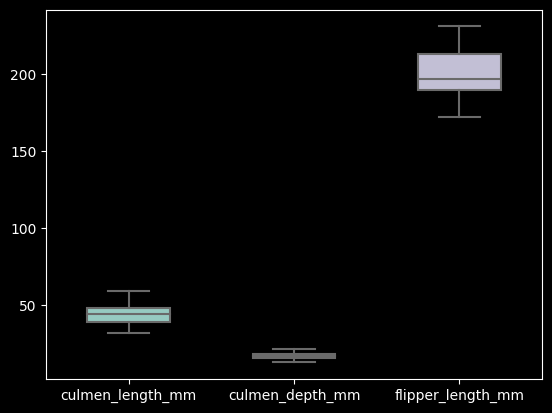

In [54]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

c:\Users\Muhammad Ammar Dogar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


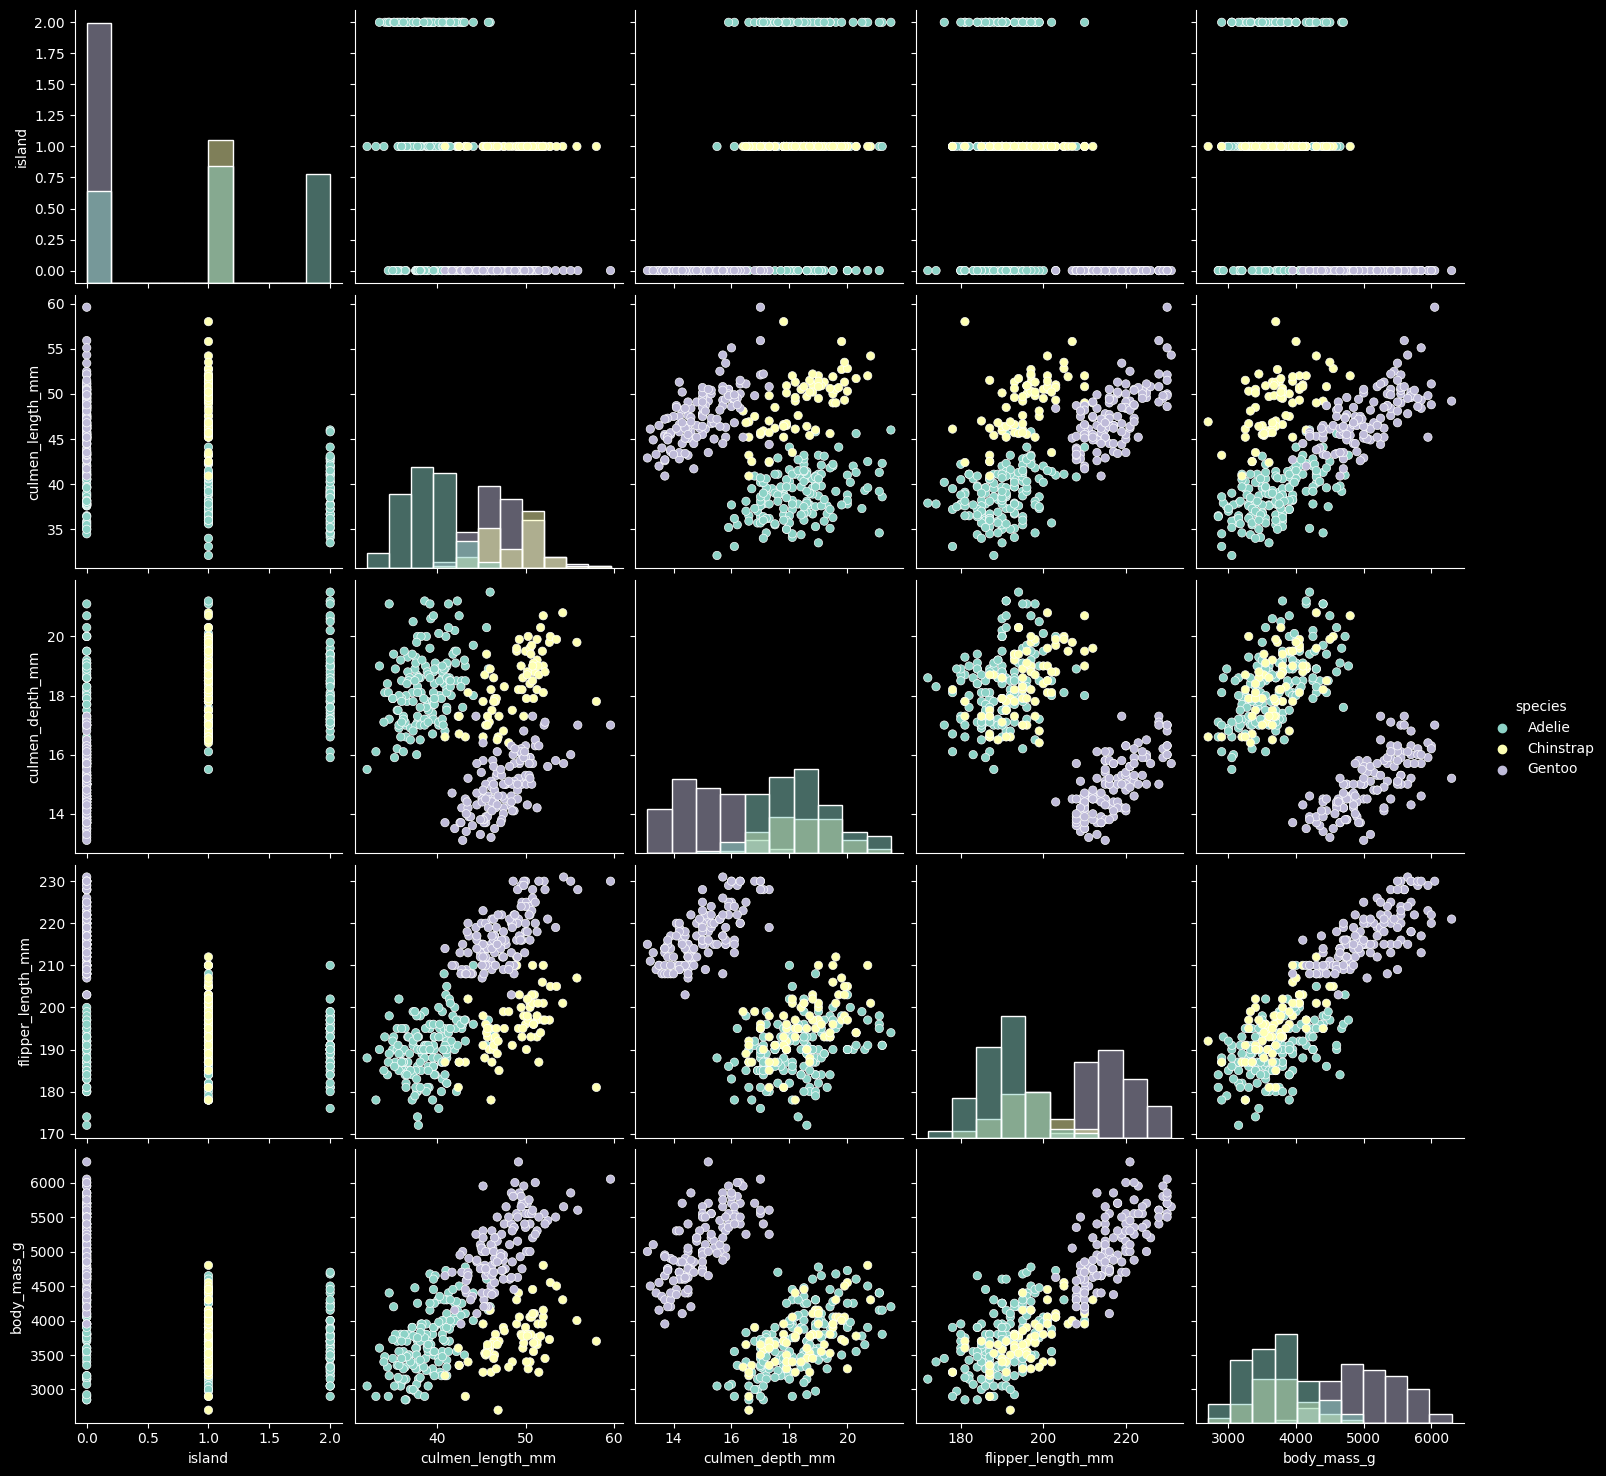

In [13]:
sns.pairplot(df, hue='species',size=3, diag_kind='hist')

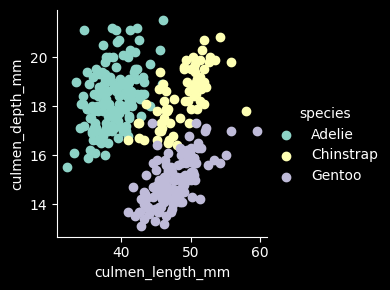

In [14]:
sns.FacetGrid(df, hue="species") \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

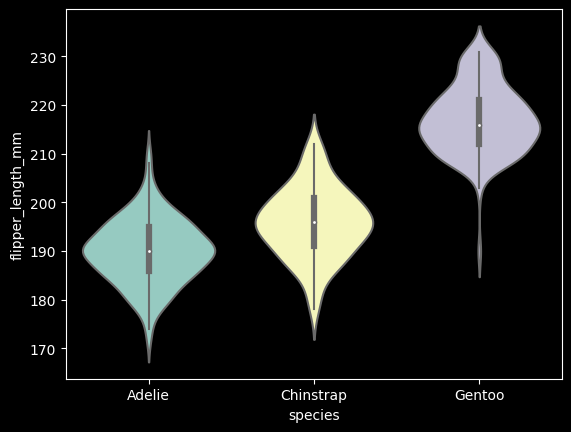

In [31]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

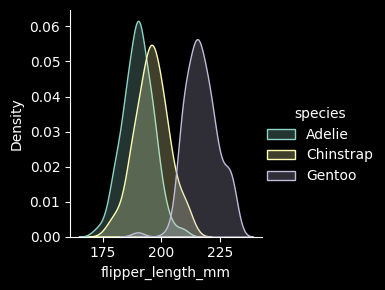

In [34]:
sns.FacetGrid(df, hue="species") \
   .map(sns.kdeplot, "flipper_length_mm",fill=True) \
   .add_legend()
   

In [55]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1


In [56]:
X=df.drop('species', axis=1)
y=df['species']

In [57]:
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,41.1,17.0,190.0,3800.0,2
4,2,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...
339,0,41.1,17.0,190.0,3800.0,2
340,0,46.8,14.3,215.0,4850.0,1
341,0,50.4,15.7,222.0,5750.0,2
342,0,45.2,14.8,212.0,5200.0,1


In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int32

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split=train_test_split(X, y, test_size=0.2, random_state=0)


In [67]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (275, 6)
X_test (69, 6)
y_train (275,)
y_test (69,)


In [68]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [75]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
cm=confusion_matrix(y_test, y_predict)
cm

array([[34,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 25]], dtype=int64)

In [78]:
ac=accuracy_score(y_test, y_predict)
ac

1.0

In [79]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=5, criterion='gini', random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [81]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
cm=confusion_matrix(y_test, y_predict)
cm

array([[34,  0,  0],
       [ 1,  9,  0],
       [ 0,  0, 25]], dtype=int64)

In [83]:
ac=accuracy_score(y_test, y_predict)
ac

0.9855072463768116

In [84]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69

